In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import pandas as pd

In [ ]:
data = load_breast_cancer()
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(data.data,data.target,test_size=0.2,random_state=34,stratify=data.target)

In [ ]:
df_cancer = pd.DataFrame(data.data,columns=data.feature_names)
df_cancer['target'] = data.target
df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
X_test.shape

(114, 30)

In [ ]:
from sklearn.model_selection import KFold

cv = KFold(n_splits=5, shuffle=True)

max_depth = X_test.shape[1]

avg_acc = []
for depth in range(1,max_depth):
    model = RandomForestClassifier(max_depth=depth)

    fold_acc = []

    for train_fold, valid_fold in cv.split(df_cancer):
        f_train = df_cancer.loc[train_fold]
        f_valid = df_cancer.loc[valid_fold]

        rf_model = model.fit(f_train.iloc[:,:-1] , f_train.iloc[:,-1])
        rf_score = rf_model.score(f_valid.iloc[:,:-1],f_valid.iloc[:,-1])
        fold_acc.append(rf_score)

    avg_acc.append(sum(fold_acc)/len(fold_acc))





In [ ]:
max(avg_acc)

0.9683278993945039

In [ ]:
avg_acc.index(max(avg_acc))

11

In [ ]:
from sklearn.model_selection import GridSearchCV

rf_model = RandomForestClassifier(random_state=34)

parameters = {'n_estimators':[3,4],'max_depth':range(1,30),
              'min_samples_split':[3,4,5]
              }

rf_grid = GridSearchCV(rf_model,param_grid=parameters,cv=5)

In [ ]:
rf_grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=34),
             param_grid={'max_depth': range(1, 30),
                         'min_samples_split': [3, 4, 5],
                         'n_estimators': [3, 4]})

In [ ]:
result = pd.DataFrame(rf_grid.cv_results_['params'])
result['mean_test_score'] = rf_grid.cv_results_['mean_test_score']
result.sort_values('mean_test_score',ascending=False)

,max_depth,min_samples_split,n_estimators,mean_test_score
24,5,3,3,0.956044
17,3,5,4,0.953846
114,20,3,3,0.953846
120,21,3,3,0.953846
54,10,3,3,0.953846
...,...,...,...,...
0,1,3,3,0.934066
4,1,5,3,0.934066
3,1,4,4,0.931868
5,1,5,4,0.931868


In [ ]:
rf_grid.best_estimator_.feature_importances_

array([0.01704543, 0.00482021, 0.00278239, 0.0038061 , 0.00463732,
       0.02057118, 0.24109943, 0.02768247, 0.        , 0.00278085,
       0.00721236, 0.013349  , 0.        , 0.00759055, 0.00242142,
       0.        , 0.00264312, 0.00402999, 0.00363213, 0.        ,
       0.06993524, 0.00312915, 0.05385154, 0.01737003, 0.        ,
       0.00317193, 0.00933389, 0.47710426, 0.        , 0.        ])

In [ ]:
rf_grid.best_estimator_

RandomForestClassifier(max_depth=5, min_samples_split=3, n_estimators=3,
                       random_state=34)

In [ ]:
import joblib

joblib.dump(rf_grid.best_estimator_,'cancer_model.joblib')

['cancer_model.joblib']

In [ ]:
cancer_model = joblib.load('cancer_model.joblib')
cancer_model.predict(X_test)

array([0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1])

Feature 중요도 :  [0.017 0.005 0.003 0.004 0.005 0.021 0.241 0.028 0.    0.003 0.007 0.013
 0.    0.008 0.002 0.    0.003 0.004 0.004 0.    0.07  0.003 0.054 0.017
 0.    0.003 0.009 0.477 0.    0.   ]
mean radius 0.017
mean texture 0.005
mean perimeter 0.003
mean area 0.004
mean smoothness 0.005
mean compactness 0.021
mean concavity 0.241
mean concave points 0.028
mean symmetry 0.0
mean fractal dimension 0.003
radius error 0.007
texture error 0.013
perimeter error 0.0
area error 0.008
smoothness error 0.002
compactness error 0.0
concavity error 0.003
concave points error 0.004
symmetry error 0.004
fractal dimension error 0.0
worst radius 0.07
worst texture 0.003
worst perimeter 0.054
worst area 0.017
worst smoothness 0.0
worst compactness 0.003
worst concavity 0.009
worst concave points 0.477
worst symmetry 0.0
worst fractal dimension 0.0


<Axes: >

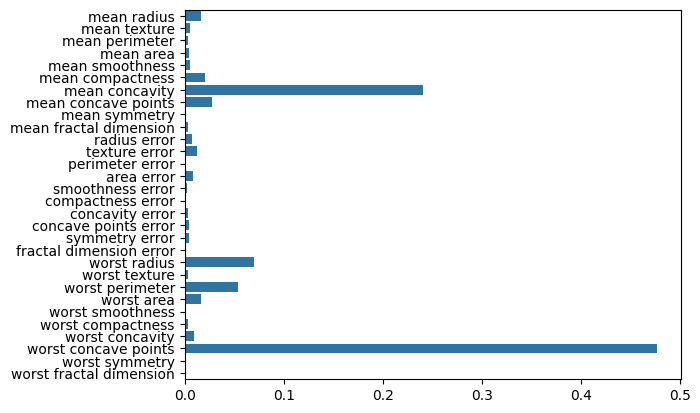

In [ ]:
import seaborn as sns
import numpy as np

print('Feature 중요도 : ',np.round(rf_grid.best_estimator_.feature_importances_,3))
feature_value = np.round(rf_grid.best_estimator_.feature_importances_,3)
for name,value in zip(data.feature_names,feature_value):
    print(name,value)

sns.barplot(x=feature_value,y=data.feature_names)